# Python DAV - Netflix Case Study

## **Data Set**
https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

**Show_id**: Unique ID for every Movie / Tv Show

**Type**: Identifier - A Movie or TV Show

**Title**: Title of the Movie / Tv Show

**Director**: Director of the Movie

**Cast**: Actors involved in the movie/show

**Country**: Country where the movie/show was produced

**Date_added**: Date it was added on Netflix

**Release_year**: Actual Release year of the movie/show

**Rating**: TV Rating of the movie/show

**Duration**: Total Duration - in minutes or number of seasons

**Listed_in**: Genre

**Description**: The summary description

## **General Objectives:**
1. Which type of shows/movies to produce?
2. How they can grow the business in different countries?



## **Things to consider**
1. Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
2. Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.

## **Evaluation Criteria (100 Points):**

1. Defining Problem Statement and Analysing basic metrics (10 Points)

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data. Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

  4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

  4.2 For categorical variable(s): Boxplot (10 Points)

  4.3 For correlation: Heatmaps, Pairplots (10 Points)

5. Missing Value & Outlier check (Treatment optional) (10 Points)

6. Insights based on Non-Graphical and Visual Analysis (10 Points)

  6.1 Comments on the range of attributes

  6.2 Comments on the distribution of the variables and relationship between them

  6.3 Comments for each univariate and bivariate plot

7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

## #1. Defining Problem Statement and Analysing basic metrics (10 Points)

#### Answer:

**Scope:**

Since the objective of a business is to make money, based on the data provided, the success metric here can be the number of movies produced in a given period of time, since there is no info related to money. So instead of saying "I want to analyze x", you could say "I want to find out how x affects y and z".

**Metrics:**

As per the data provided, Quantity of Movies or Shows produced in a given time period seems to be the only important metric for Netflix that contributes to businees success.


**Objectives:**
1. How has the number of movies released per year changed over the last 20-30 years?
2. Comparison of tv shows vs. movies.
3. What is the best time to launch a TV show?
4. Analysis of actors/directors of different types of shows/movies.
5. Does Netflix has more focus on TV Shows than movies in recent years
6. Understanding what type of content is available in different countries
7. Top 5 frequently occuring Movie ratings overall
8. Top 5 frequently occuring Movie ratings every year
9. Top 5 Genres overall
10. Top 5 Genres last year
11. Top 3 movies based on duration
12. Top 3 tv shows based on duration
13. Most common genres
14. Is there a particular duration that people like before they drop the show

## #2. Observations on the shape of data, data types of all the attributes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 1g0VlH-aeLgbleBq6WMegLzVZKByqVVEw

Downloading...
From: https://drive.google.com/uc?id=1g0VlH-aeLgbleBq6WMegLzVZKByqVVEw
To: /content/netflix.csv
100% 3.42M/3.42M [00:00<00:00, 142MB/s]


In [ ]:
df = pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.size

105684

In [ ]:
df.ndim

2

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Answer:
* There are 8807 rows and 12 columns

## #3. Conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)
* show_id, description columns can be dropped as they dont seem important for analysis.

In [ ]:
df.drop(["show_id", "description"], axis=1, inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.duplicated().any()

False

In [ ]:
df.isna().sum()

,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3
listed_in,0


In [ ]:
df["rating"].replace(to_replace=[np.NaN], value=df["rating"].mode(), inplace=True)
df[df["rating"].isna() == True]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in


In [ ]:
df[df["type"] == "Movie"]["duration"].isna().sum()

3

In [ ]:

mean_movie_duration = str(int(df[df["type"] == "Movie"]["duration"].apply(
    lambda x : 0 if x is np.nan else int(str(x).split(" ")[0])
    ).mean())) + " min"
print(mean_movie_duration)
# df[df["type"] == "Movie"]["duration"]
df["duration"].replace(
    to_replace=[np.NaN],
    value=mean_movie_duration,
    inplace=True
    )

99 min


In [ ]:
df["date_added"].replace(to_replace=[np.NaN], value=df["date_added"].mode(), inplace=True)
df["director"].replace(to_replace=[np.NaN], value="", inplace=True)
df["cast"].replace(to_replace=[np.NaN], value="", inplace=True)
df["country"].replace(to_replace=[np.NaN], value="", inplace=True)

In [ ]:
df.isna().sum()

,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


#### Answer:
* Imputed 4 columns that had null values. director	2634, cast	825, country	831, date_added	10

## #4. How has the number of movies released per year changed over the last 20-30 years?

In [ ]:
df1 = df[df["release_year"] > 1990].sort_values(by=["release_year"], ascending=False)
df2 = df1.groupby("release_year")["release_year"].value_counts().reset_index()
df2.tail()

,release_year,count
26,2017,1032
27,2018,1147
28,2019,1030
29,2020,953
30,2021,592


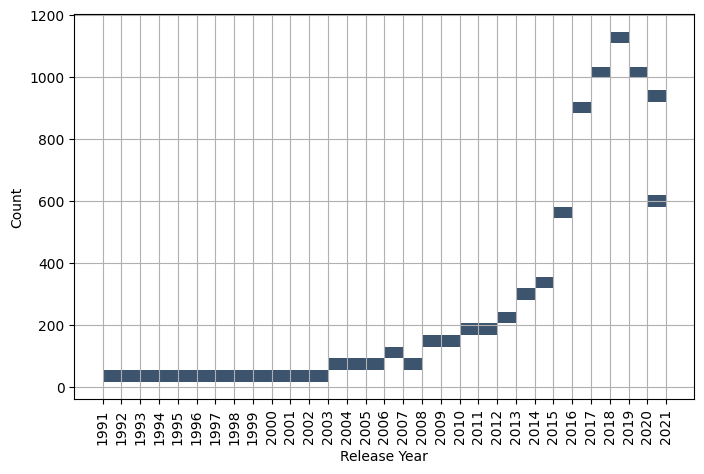

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.grid()
myplot = sns.histplot(data=df2, x="release_year", y="count", bins=30)
myplot.set_xticks(df2["release_year"])

plt.show()

In [ ]:
df2[df2["release_year"] == 2018]

,release_year,count
27,2018,1147


In [ ]:
df2[df2["release_year"] == 2003]

,release_year,count
12,2003,61


In [ ]:
df2[df2["release_year"] == 2021]

,release_year,count
30,2021,592


#### Answer:
* It appears that the maximum number of movies were made in the year 2018
* We see a rise from the year 2003 until 2018
* We see a fall after 2018

## #5. Comparison of tv shows vs. movies.

In [ ]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
df.groupby("type")["type"].value_counts().reset_index()

,type,count
0,Movie,6131
1,TV Show,2676


In [ ]:
total = df["release_year"].max() - df["release_year"].min()
total

96

In [ ]:
dftvshow = df[df["type"] == "TV Show"]
dftvshow.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [ ]:
dftvshow["duration"].apply(lambda x : int(x.split(" ")[0])).mean()

1.764947683109118

In [ ]:
dfmovies = df[df["type"] == "Movie"]
dfmovies.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
6,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",,"September 24, 2021",2021,PG,91 min,Children & Family Movies


In [ ]:
dfmovies["duration"].apply(lambda x : int(str(x).split(" ")[0])).mean()

99.57690425705431

In [ ]:
df3 = df.groupby(["release_year"])["type"].value_counts().reset_index()
df3

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,TV Show,315


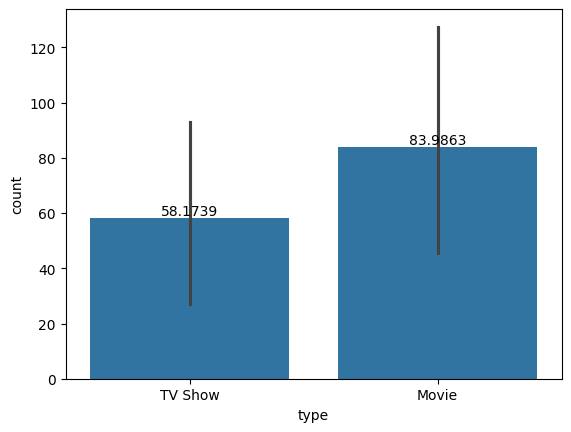

In [ ]:
# Num of movies and TV Shows released every year
myplot = sns.barplot(data=df3, x="type", y="count")

for i in myplot.containers:
  myplot.bar_label(i)

#### Answer:
* The given data spans for 96 years
* There seems to be 6131 movies and 2676 TV Shows made
* Average duration of a TV Show is 1.7 Seasons
* Average duration of a Movie is 100 mins.

## #6. What is the best time to launch a TV show?

In [ ]:
df1 = df[df["type"] == "TV Show"]
df1.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"


In [ ]:
df1.groupby("release_year")["release_year"].value_counts().tail()

,count
release_year,
2017,265
2018,380
2019,397
2020,436
2021,315


In [ ]:
df1["date_added"]

,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"
...,...
8795,"May 1, 2018"
8796,"January 17, 2017"
8797,"September 13, 2018"
8800,"December 15, 2016"


In [ ]:
df1["date_added"] = pd.to_datetime(df1["date_added"].apply(lambda x : x.strip()))
df["date_added"] = df1["date_added"]

<ipython-input-311-cc5338d56b0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["date_added"] = pd.to_datetime(df1["date_added"].apply(lambda x : x.strip()))


In [ ]:
df1.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [ ]:
df1.groupby("date_added")["date_added"].value_counts().reset_index().sort_values(["count"], ascending=False).head(10)

,date_added,count
956,2021-07-06,31
32,2016-01-01,24
156,2017-07-01,23
163,2017-08-01,23
601,2020-01-01,23
942,2021-06-19,21
410,2019-02-01,20
563,2019-11-01,16
95,2016-12-15,14
499,2019-07-12,14


In [ ]:
temp_df = df1["date_added"].dt.month.value_counts().reset_index()
temp_df

,date_added,count
0,12,266
1,7,262
2,9,251
3,8,236
4,6,236
5,10,215
6,4,214
7,3,213
8,11,207
9,1,202


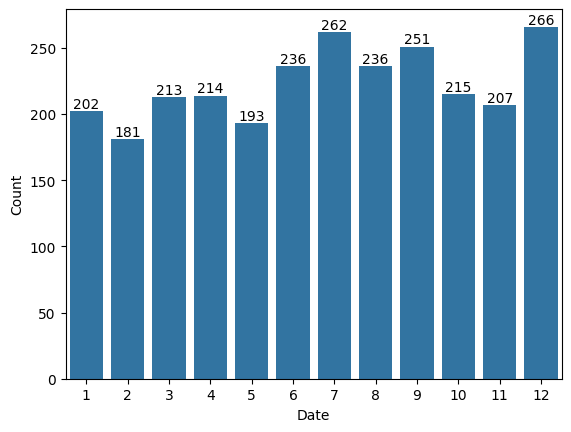

In [ ]:
myplot = sns.barplot(data=temp_df, x="date_added", y="count")
plt.xlabel("Date")
plt.ylabel("Count")

for i in myplot.containers:
  myplot.bar_label(i)

plt.show()

#### Answer:
* It looks like December, July, September months are best time to release TV shows

## #7. Analysis of actors/directors of different types of shows/movies.

In [ ]:
df2 = df.copy()
df2.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,NaT,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [ ]:
cast_df = df2["cast"].str.split(pat=",", expand=True, n=5)
cast_df.head(2)

,0,1,2,3,4,5
0,,None,None,None,None,None
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,"Natasha Thahane, Arno Greeff, Xolile Tshabala..."


In [ ]:
cast_df.columns

RangeIndex(start=0, stop=6, step=1)

In [ ]:
cast_df.columns = ["cast " + str(x) for x in range(len(cast_df.columns))]

In [ ]:
cast_df.head(2)

,cast 0,cast 1,cast 2,cast 3,cast 4,cast 5
0,,None,None,None,None,None
1,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,"Natasha Thahane, Arno Greeff, Xolile Tshabala..."


In [ ]:
df2.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
cast_df.columns

Index(['cast 0', 'cast 1', 'cast 2', 'cast 3', 'cast 4', 'cast 5'], dtype='object')

In [ ]:
df2 = df2.join([cast_df])
df2.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,cast 0,cast 1,cast 2,cast 3,cast 4,cast 5
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,NaT,2020,PG-13,90 min,Documentaries,,None,None,None,None,None
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,"Natasha Thahane, Arno Greeff, Xolile Tshabala..."


In [ ]:
df2 = pd.melt(
    df2,
    id_vars=["type", "title", "director", "cast", "country", "date_added", "release_year", "rating", "duration", "listed_in"],
    value_name="cast_full"
    )
df2.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,variable,cast_full
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,NaT,2020,PG-13,90 min,Documentaries,cast 0,
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",cast 0,Ama Qamata


In [ ]:
df2.drop(["cast", "variable"], axis=1, inplace=True)
df2.head(2)

,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast_full
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,NaT,2020,PG-13,90 min,Documentaries,
1,TV Show,Blood & Water,,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata


In [ ]:
director_df = df2["director"].str.split(pat=",", expand=True, n=5)
director_df.head(2)

,0,1,2,3,4,5
0,Kirsten Johnson,None,None,None,None,None
1,,None,None,None,None,None


In [ ]:
director_df.columns = ["director" + str(x) for x in range(len(director_df.columns))]

In [ ]:
df2 = df2.join([director_df])
df2.head(2)

,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast_full,director0,director1,director2,director3,director4,director5
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,NaT,2020,PG-13,90 min,Documentaries,,Kirsten Johnson,None,None,None,None,None
1,TV Show,Blood & Water,,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,,None,None,None,None,None


In [ ]:
df2 = pd.melt(
    df2,
    id_vars=["type", "title", "director", "country", "date_added", "release_year", "rating", "duration", "listed_in", "cast_full"],
    value_name="director_full"
    )
df2.head(2)

,type,title,director,country,date_added,release_year,rating,duration,listed_in,cast_full,variable,director_full
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,NaT,2020,PG-13,90 min,Documentaries,,director0,Kirsten Johnson
1,TV Show,Blood & Water,,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,director0,


In [ ]:
df2.drop(["director", "variable"], axis=1, inplace=True)
df2.head(2)

,type,title,country,date_added,release_year,rating,duration,listed_in,cast_full,director_full
0,Movie,Dick Johnson Is Dead,United States,NaT,2020,PG-13,90 min,Documentaries,,Kirsten Johnson
1,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,


In [ ]:
genre_df = df2["listed_in"].str.split(pat=",", expand=True, n=5)
genre_df.head(2)

,0,1,2
0,Documentaries,None,None
1,International TV Shows,TV Dramas,TV Mysteries


In [ ]:
genre_df.columns = ["genre" + str(x) for x in range(len(genre_df.columns))]

In [ ]:
df2 = df2.join([genre_df])
df2.head(2)

,type,title,country,date_added,release_year,rating,duration,listed_in,cast_full,director_full,genre0,genre1,genre2
0,Movie,Dick Johnson Is Dead,United States,NaT,2020,PG-13,90 min,Documentaries,,Kirsten Johnson,Documentaries,None,None
1,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,,International TV Shows,TV Dramas,TV Mysteries


In [ ]:
df2 = pd.melt(
    df2,
    id_vars=["type", "title", "country", "date_added", "release_year", "rating", "duration", "listed_in", "cast_full", "director_full"],
    value_name="genre_full"
    )
df2.head(2)

,type,title,country,date_added,release_year,rating,duration,listed_in,cast_full,director_full,variable,genre_full
0,Movie,Dick Johnson Is Dead,United States,NaT,2020,PG-13,90 min,Documentaries,,Kirsten Johnson,genre0,Documentaries
1,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",Ama Qamata,,genre0,International TV Shows


In [ ]:
df2.drop(["listed_in", "variable"], axis=1, inplace=True)
df2.head(2)

,type,title,country,date_added,release_year,rating,duration,cast_full,director_full,genre_full
0,Movie,Dick Johnson Is Dead,United States,NaT,2020,PG-13,90 min,,Kirsten Johnson,Documentaries
1,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,Ama Qamata,,International TV Shows


#### 7.1 Most popular actor overall

In [ ]:
df3 = df2["cast_full"].value_counts().reset_index().head()
df4 = df3[df3['cast_full'] != ""]
df4

,cast_full,count
1,Rupa Bhimani,558
2,Julie Tejwani,486
3,Anupam Kher,468
4,Shah Rukh Khan,468


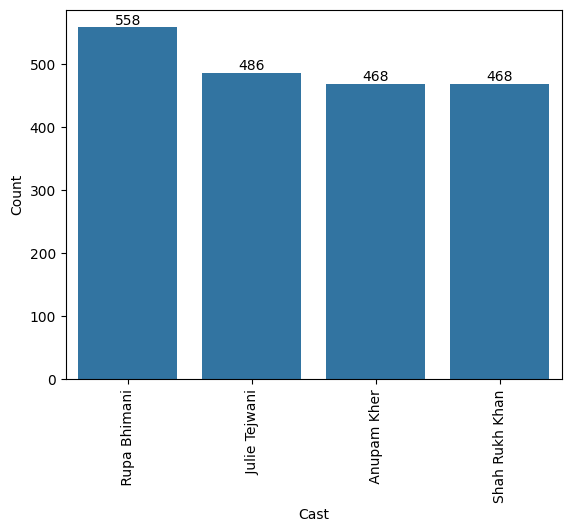

In [ ]:
myplot = sns.barplot(data=df4, x="cast_full", y="count")
plt.xlabel("Cast")
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize=10)

for i in myplot.containers:
  myplot.bar_label(i)

plt.show()

#### Answer:
* It looks like Rupa Bhimani is the most popular actor overall

#### 7.2 Most popular actor overall

In [ ]:
df3 = df2["director_full"].value_counts().reset_index().head()
df4 = df3[df3['director_full'] != ""]

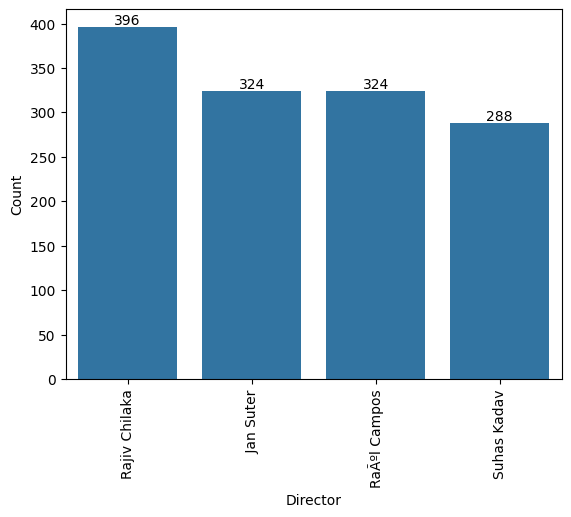

In [ ]:
myplot = sns.barplot(data=df4, x="director_full", y="count")
plt.xlabel("Director")
plt.ylabel("Count")
plt.xticks(rotation=90, fontsize=10)

for i in myplot.containers:
  myplot.bar_label(i)

plt.show()

#### Answer:
* It looks like Rajiv Chilaka is the most popular director overall

**More Questions**
* Most popular actor movies
* Most popular actor tv shows
* Most popular director movies
* Most popular director tv shows
* Actors who worked with the most popular director
* Directors who worked with the most popular actor

## #8. Does Netflix has more focus on TV Shows than movies in recent years

In [ ]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,NaT,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,,,,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
df1 = df[df["release_year"] >= df["release_year"].max() - 5]
df1.tail(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
8797,TV Show,Zak Storm,,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV
8803,TV Show,Zombie Dumb,,,,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"


In [ ]:
c1 = df1[df1["type"] == "Movie"].shape[0]
c1

3619

In [ ]:
c2 = df1[df1["type"] == "TV Show"].shape[0]
c2

2037

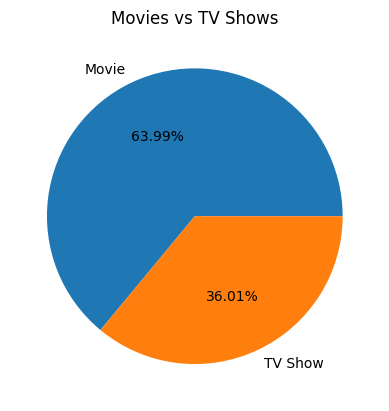

In [ ]:
c = np.array([c1, c2])
mylabels = ["Movie", "TV Show"]
plt.pie(c,
       labels=mylabels,
       startangle=0,
       autopct = '%.2f%%') # label the wedges with their numeric value

plt.title('Movies vs TV Shows')
plt.show()

#### Answer:
* It seems like in the past 5 years Netflix is more focused on Movies than TV Shows

## #9. Understanding what type of content is available in different countries

In [ ]:
df2 = df.copy()
df2.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,NaT,2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"


In [ ]:
country_df = df2["country"].str.split(pat=",", expand=True, n=10)
country_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,United States,None,None,None,None,None,None,None,None,None,None
1,South Africa,None,None,None,None,None,None,None,None,None,None


In [ ]:
country_df.columns = ["country" + str(x) for x in range(len(country_df.columns))]

In [ ]:
df2 = df2.join([country_df])
df2.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,...,country1,country2,country3,country4,country5,country6,country7,country8,country9,country10
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,NaT,2020,PG-13,90 min,Documentaries,...,None,None,None,None,None,None,None,None,None,None
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df2 = pd.melt(
    df2,
    id_vars=["type", "title", "director", "cast", "country", "date_added", "release_year", "rating", "duration", "listed_in"],
    value_name="country_full"
    )
df2.head(2)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,variable,country_full
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,NaT,2020,PG-13,90 min,Documentaries,country0,United States
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",country0,South Africa


In [ ]:
df2.drop(["country", "variable"], axis=1, inplace=True)
df2.head(2)

,type,title,director,cast,date_added,release_year,rating,duration,listed_in,country_full
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,NaT,2020,PG-13,90 min,Documentaries,United States
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",South Africa


#### 9.1 Most common rating in country

In [ ]:
# df3 = df2.groupby("country_full").first().reset_index()
# df3[df3.notnull().all(axis=1)]
df3 = df2.groupby(["country_full"]).first()
df3.head(2)

,type,title,director,cast,date_added,release_year,rating,duration,listed_in
country_full,,,,,,,,,
,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
Afghanistan,Movie,The Land of the Enlightened,Pieter-Jan De Pue,Sohrab Nazari,NaT,2016,TV-MA,84 min,"Documentaries, International Movies"


#### Answer:
* We can customise content based on the most popular rating of movies in a country

**More Questions**
* Most popular genre in country
* Most popular director in country
* Most popular actor in country
* Most common rating in country
* Most common duration in country

# Recommendations
1. Produce more native language shows - localisation of cast, director, theme/story, sets/locations.
2. Produce movies/shows in popular genre in that country.
3. Produce shows/movies with famous directors/actors.
4. Release during peak movie season in a year in that country.
5. While a good story can have any amount of duration, sticking to expectations of movie and TV show durations might improve watch time.